In [2]:
'''
Uso de árboles de decisión como Regresor.

Vamos a hacer un modelo para un problema con pocos datos.
dOCUMENTACIÓN OFICIAL SKLEARN DECISION TREE
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
'''

# cargamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')


In [3]:
# cargamos los datos en un df, cambiando separador que no es 'coma' sino 'tab'

data = pd.read_csv('https://github.com/palasatenea66/DATASETS/raw/main/datos_V_I.txt', sep = '\t')

In [4]:
print(data.shape)
print(data.columns)
data.head(12)

(12, 16)
Index(['Vcelda1', 'Icelda1', 'Vcelda2', 'Icelda2', 'Vcelda3', 'Icelda3',
       'Vcelda4', 'Icelda4', 'Vcelda5', 'Icelda5', 'Vcelda6', 'Icelda6',
       'Vcelda7', 'Icelda7', 'Vcelda8', 'Icelda8'],
      dtype='object')


,Vcelda1,Icelda1,Vcelda2,Icelda2,Vcelda3,Icelda3,Vcelda4,Icelda4,Vcelda5,Icelda5,Vcelda6,Icelda6,Vcelda7,Icelda7,Vcelda8,Icelda8
0,0.0,5.46,0.0,5.501,0.0,5.50,0.0,5.44,0.0,5.39,0.0,5.45,0.0,5.51,0.0,5.30
1,2.3,5.43,0.9,5.490,0.6,5.46,0.5,5.44,2.6,5.39,0.7,5.45,0.6,5.48,2.9,5.28
2,6.8,5.42,2.7,5.490,2.1,5.45,2.9,5.43,7.2,5.38,2.0,5.44,2.6,5.47,6.5,5.27
3,11.0,5.32,7.2,5.490,8.2,5.42,6.6,5.42,11.4,5.30,7.3,5.43,9.6,5.46,8.4,5.26
4,16.5,4.44,13.8,5.370,15.7,4.89,11.7,5.40,15.6,4.73,15.5,4.86,16.0,4.67,14.0,5.18
5,17.7,3.45,17.4,4.070,18.1,3.15,15.1,5.00,17.5,3.50,17.1,3.85,17.3,3.66,15.9,4.84
6,18.3,2.80,18.3,3.130,18.6,2.46,17.3,3.56,18.2,2.72,18.1,2.80,18.0,2.86,16.7,4.50
7,18.7,2.31,18.8,2.590,18.9,2.10,18.1,2.68,18.6,2.26,18.6,2.09,18.4,2.35,17.8,3.64
8,18.9,1.96,19.1,2.050,19.1,1.83,18.6,2.07,18.9,1.90,18.8,1.81,18.6,2.13,18.5,2.94
9,19.1,1.73,19.3,1.810,19.2,1.63,18.8,1.81,19.0,1.70,18.9,1.68,18.8,1.79,19.3,1.89


In [5]:
# graficaremos las mediciones

def graficar_x_y(x, y, color, celda):
    '''Dados valores x e y, grafica dichos puntos '''
    plt.scatter(x, y, c = color)
    plt.xlabel('Voltaje(V)')
    plt.ylabel('Corriente(A)')
    plt.title(f'Curva característica Corriente vs Voltaje {celda}')
    plt.show()
    plt.close()



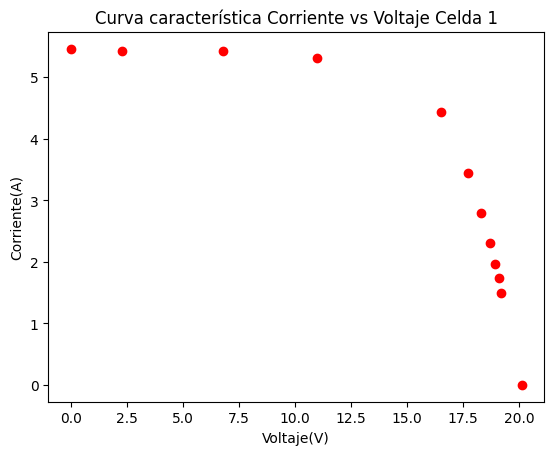

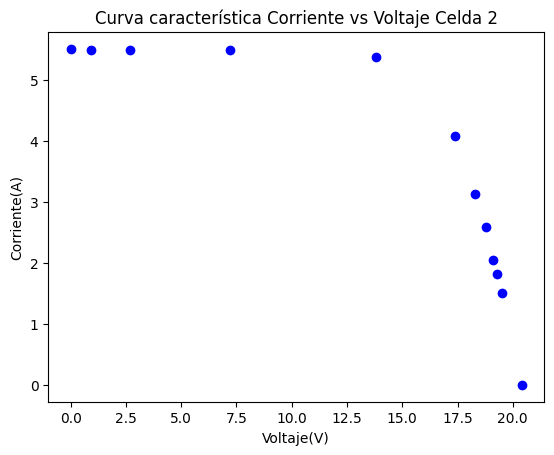

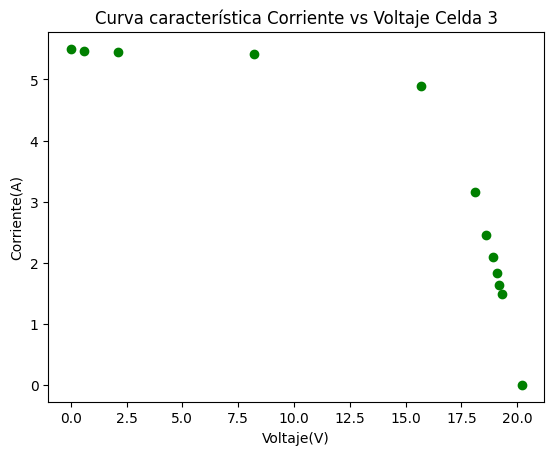

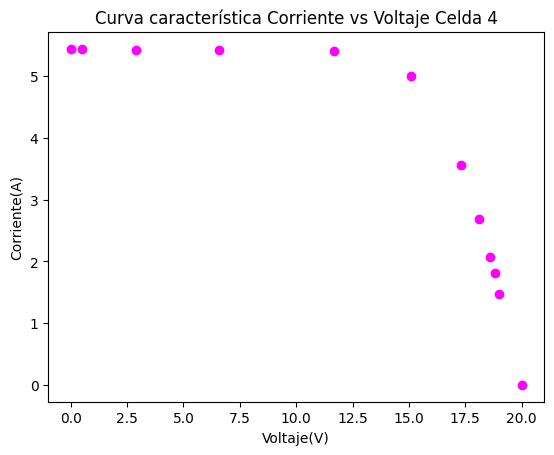

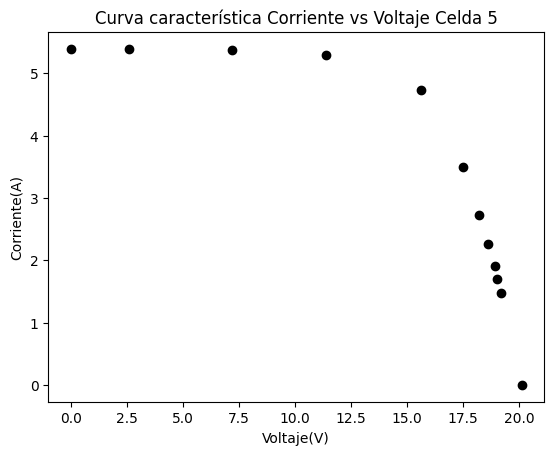

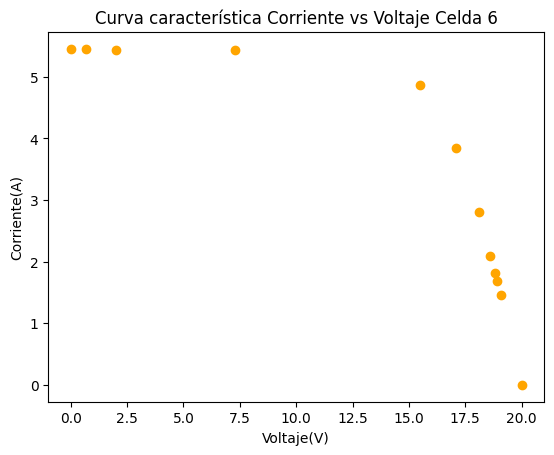

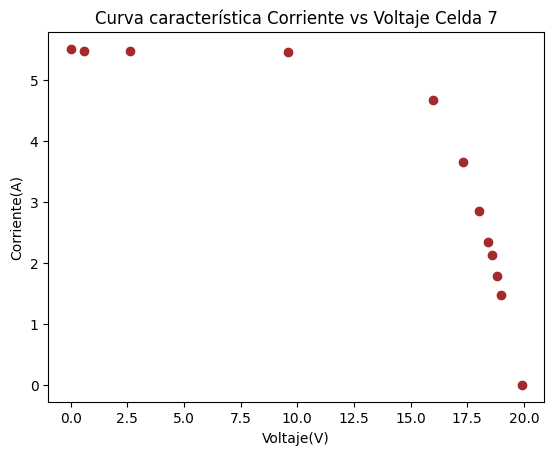

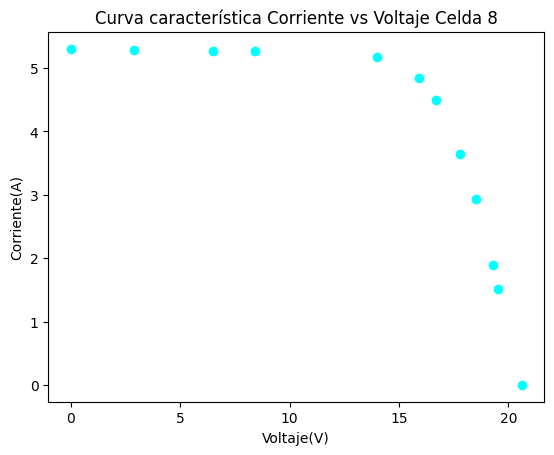

In [6]:
colores=['red', 'blue', 'green', 'magenta', 'black', 'orange', 'brown', 'cyan']

for i, color in enumerate(colores):
    graficar_x_y(data[f'Vcelda{i+1}'], data[f'Icelda{i+1}'], color, f'Celda {i+1}')

In [7]:
# Ahora ponemos a trabajar al arbolito...
# Usamos DecisionTreeRegressor(random_state = 10)
# pedimos que calcule el score (qué tan cerca está la predicción de los datos)
# comparamos la predicción con los datos y graficamos


def regresion_arbol(x, y, color, celda):
    '''Corremos un modelo de árbol de decisión para hacer una regresión de los
    datos y le pedimos el score.
    Luego hacemos correr el predictor sobre un conjunto de datos de entrada en
    el rango de la variable independiente y graficamos el resultado de la
    predicción y los datos originales '''
    # instanciamos modelo
    arbol = DecisionTreeRegressor(random_state = 16)
    # entrenamos...
    # pasamos la columna de pd a un dataframe con = cantidad de filas x 1 col
    x_df = x.to_frame(name = celda)
    arbol.fit(x_df, y)

    # VAMOS A PEDIR UNA PREDICCIÓN Y GRAFICARLA CON OTRO COLOR
    x1=np.array([5.]).reshape(-1, 1)
    y1=arbol.predict(x1)
    x2=np.array([15.]).reshape(-1, 1)
    y2=arbol.predict(x2)

    # definimos el rango de x para graficar
    x_vect = np.arange(0.0, 20.5, 0.01) # es un vector numpy, NO pandas
    x_graf = x_vect.reshape((len(x_vect), 1)) # ahora es un dataframe de 1 col

    # armamos gráfico
    plt.figure(dpi=150)   # abro figura
    plt.scatter(x, y, c = color)     # grafica los datos
    plt.plot(x_graf, arbol.predict(x_graf), color = color) # id predicción
    plt.plot(x1, y1, color='lime', marker='x')
    plt.plot(x2, y2, color='lime', marker='x')
    plt.title(f'Regresión Árbol de Decisión para Celda {celda}')
    plt.xlabel('V (voltaje en voltios)')
    plt.ylabel('I (corriente en amperes)')
    #plt.savefig(f'celda{celda}.png', dpi = 300)  # guardo en archivo
    plt.show()  # muestro gráfico
    plt.close() # cierro figura

    print('\n'*3)
    # preguntamos qué tal predice sobre los datos ingresados
    print('\n')
    print(f'Precisión sobre valores REALES: {arbol.score(x_df, y)}')
    print(f'Precisión sobre valores PREDICCION: {arbol.score(x_graf, arbol.predict(x_graf))}')
    print('\n')

    print('\n'*3)
    plt.figure(dpi=200)
    #plt.title(f'Esquema de árbol de decisión para celda {i+1}')
    plot_tree(arbol)   # gráfico del árbol que hace la regresión
    plt.show()
    plt.close()
    print('\n'*3)


    return

'''
class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best',
max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
 max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
 ccp_alpha=0.0)

sklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None,
class_names=None, label='all', filled=False, impurity=True, node_ids=False,
proportion=False, rounded=False, precision=3, ax=None, fontsize=None)

matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None,
edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>,
clear=False, **kwargs)
'''

"\nclass sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best',\nmax_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,\n max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,\n ccp_alpha=0.0)\n\nsklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None,\nclass_names=None, label='all', filled=False, impurity=True, node_ids=False,\nproportion=False, rounded=False, precision=3, ax=None, fontsize=None)\n\nmatplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None,\nedgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>,\nclear=False, **kwargs)\n"

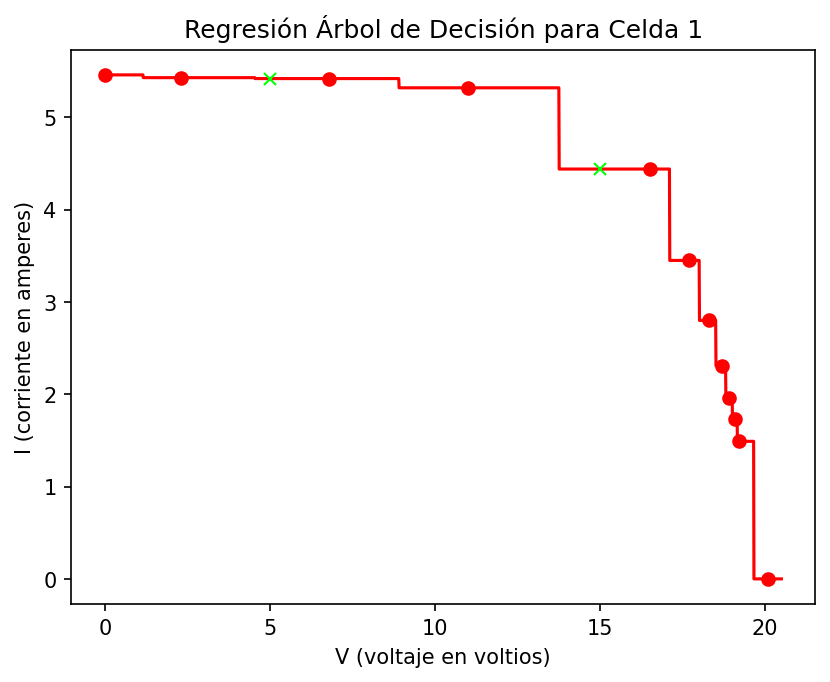







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








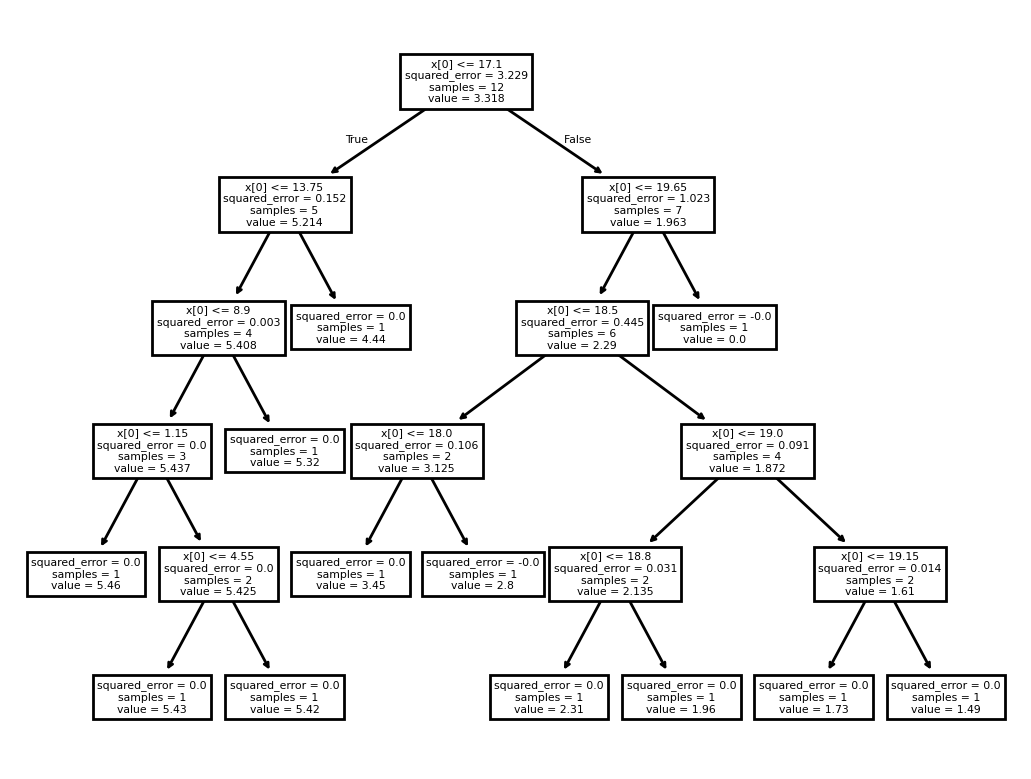

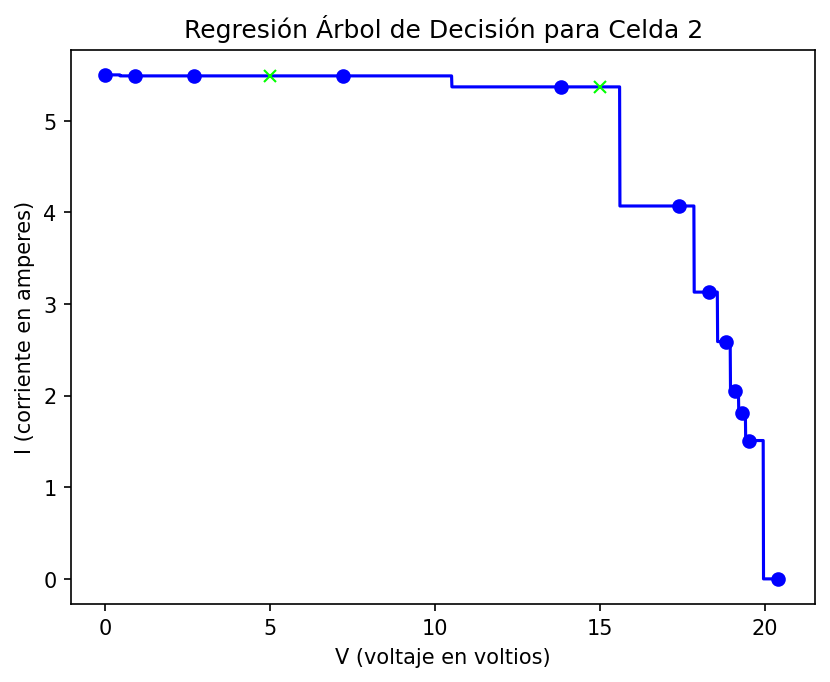







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








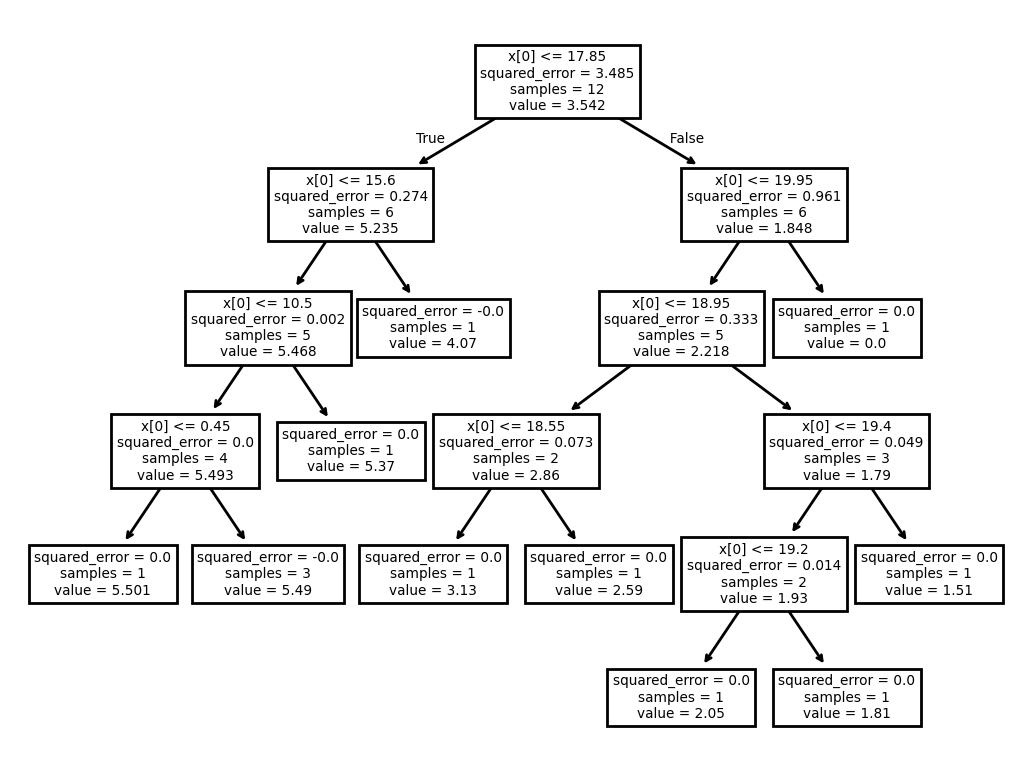

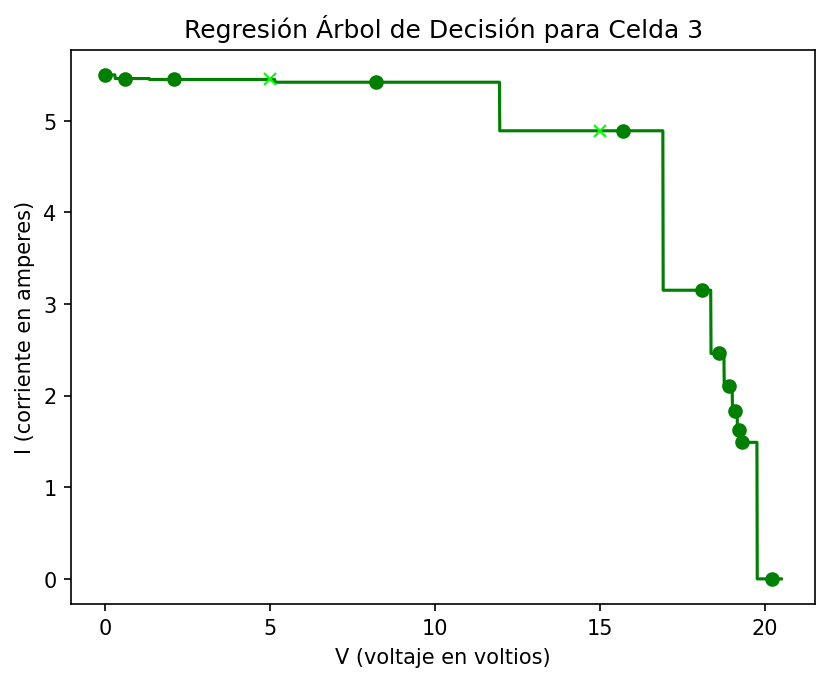







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








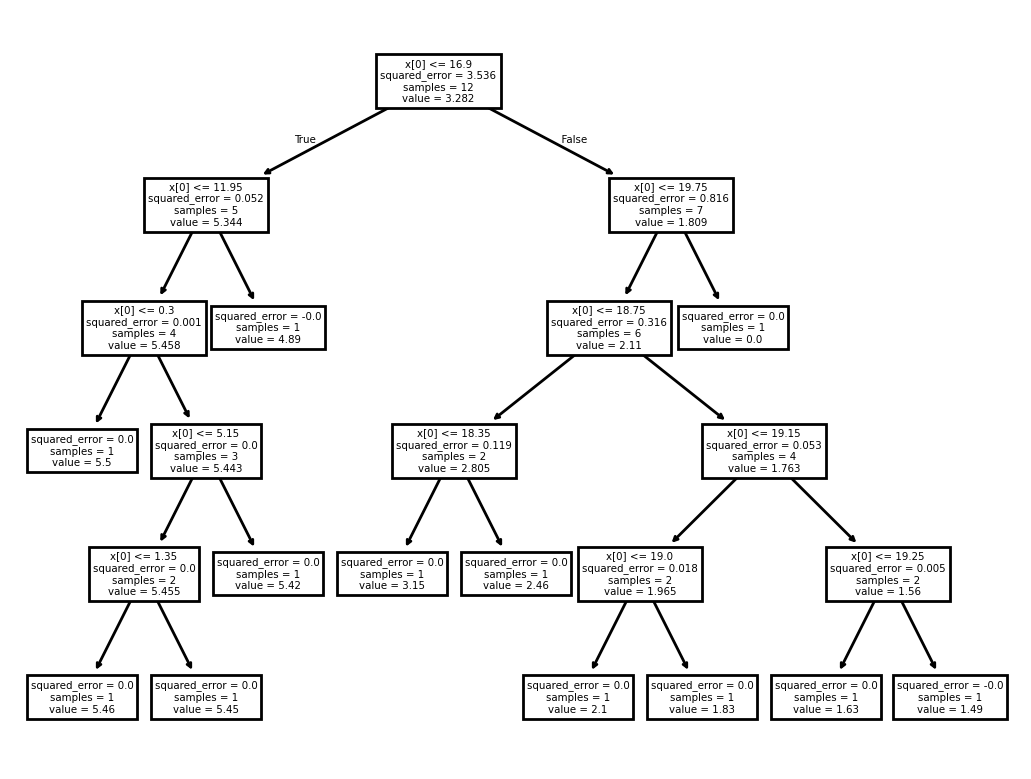

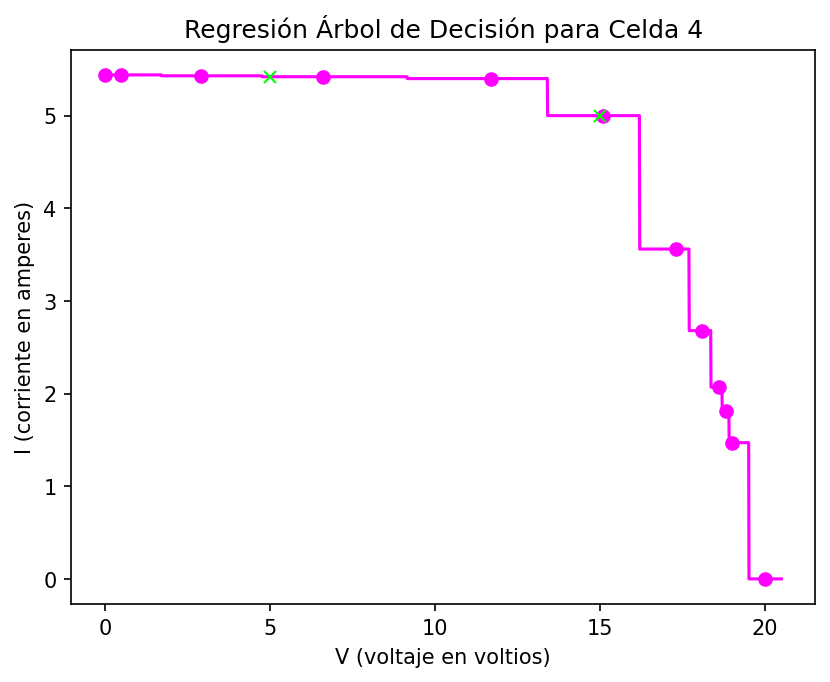







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








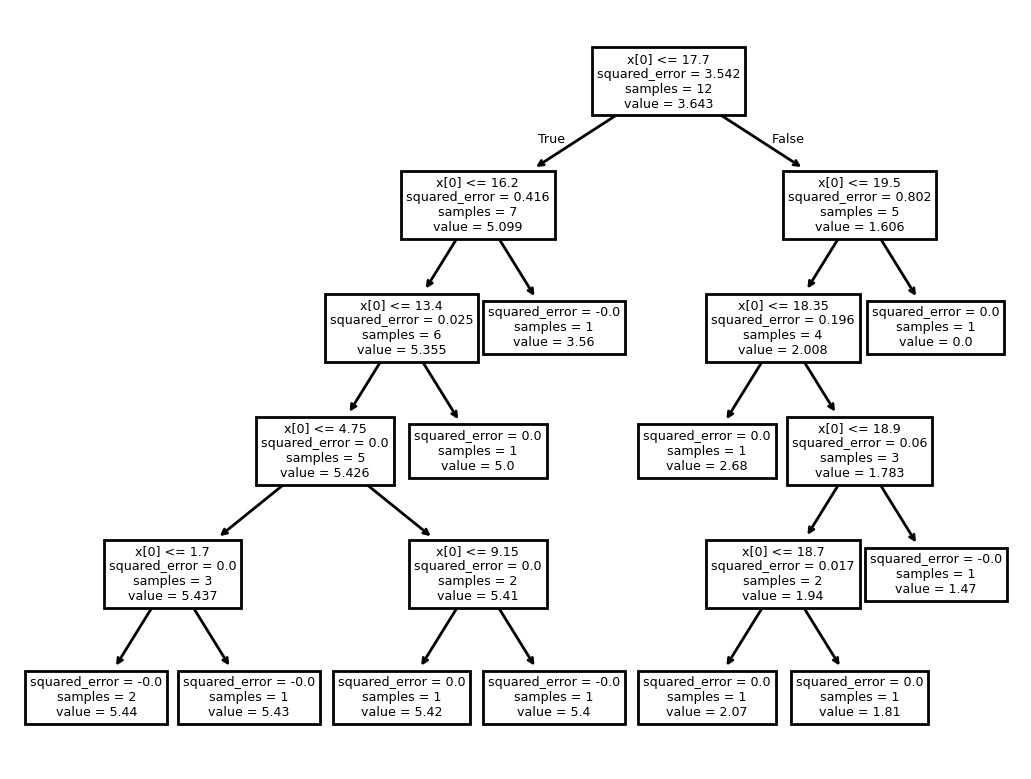

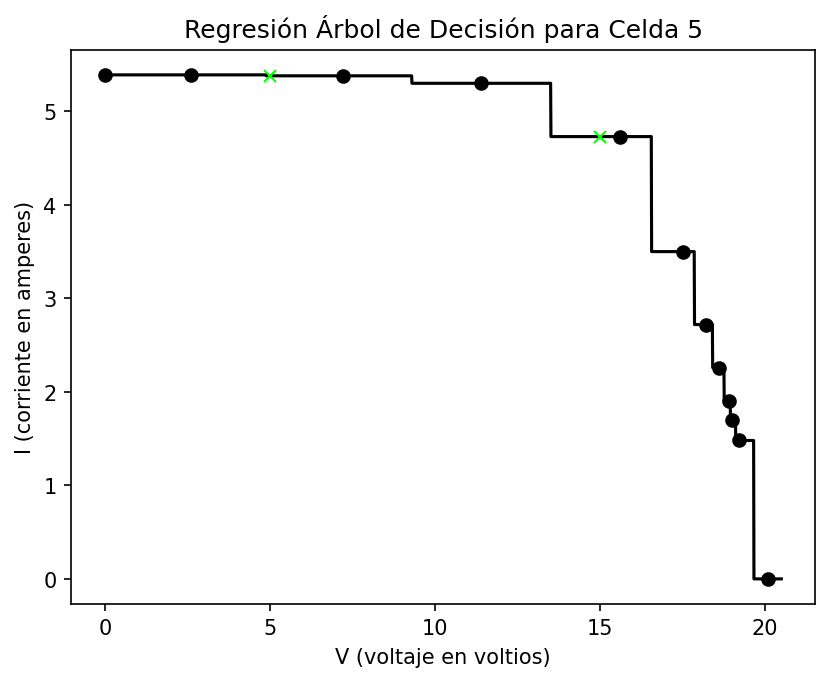







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








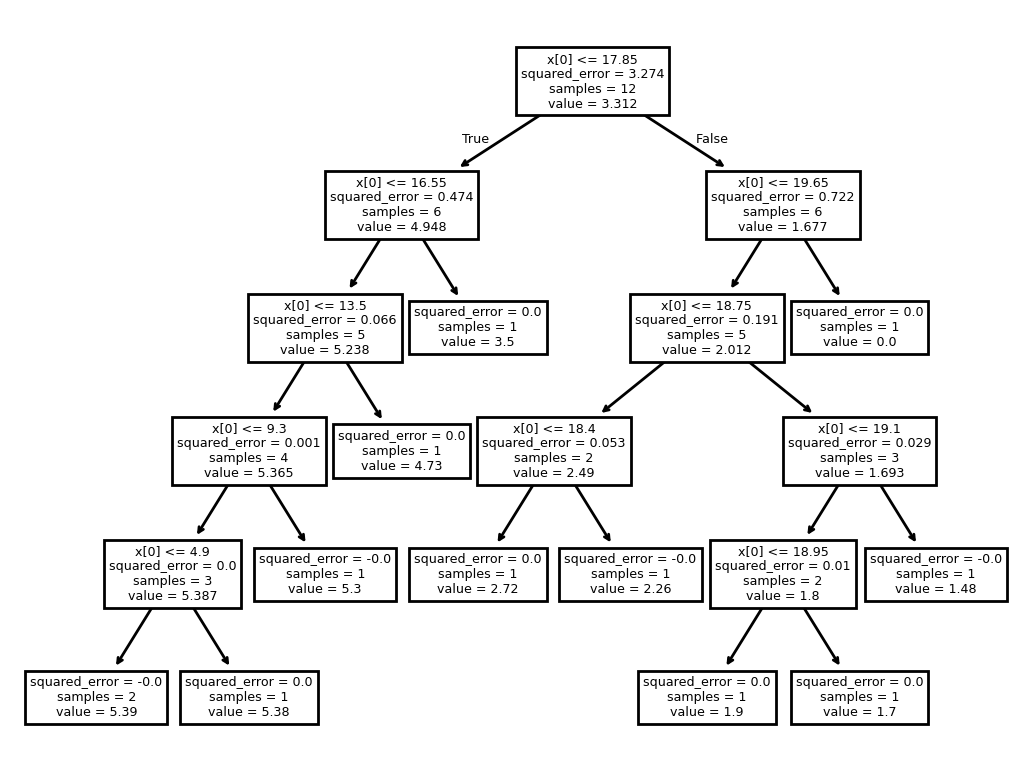

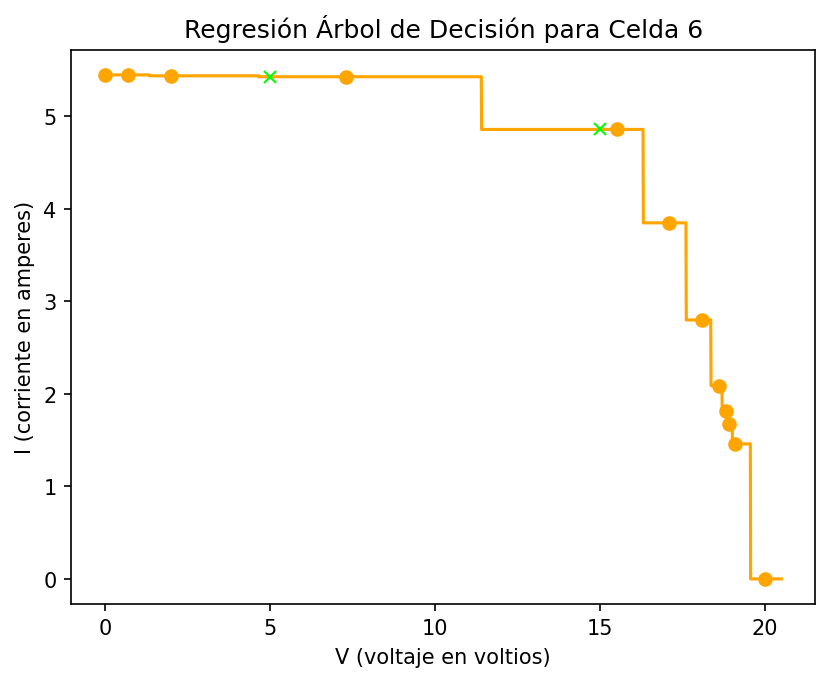







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








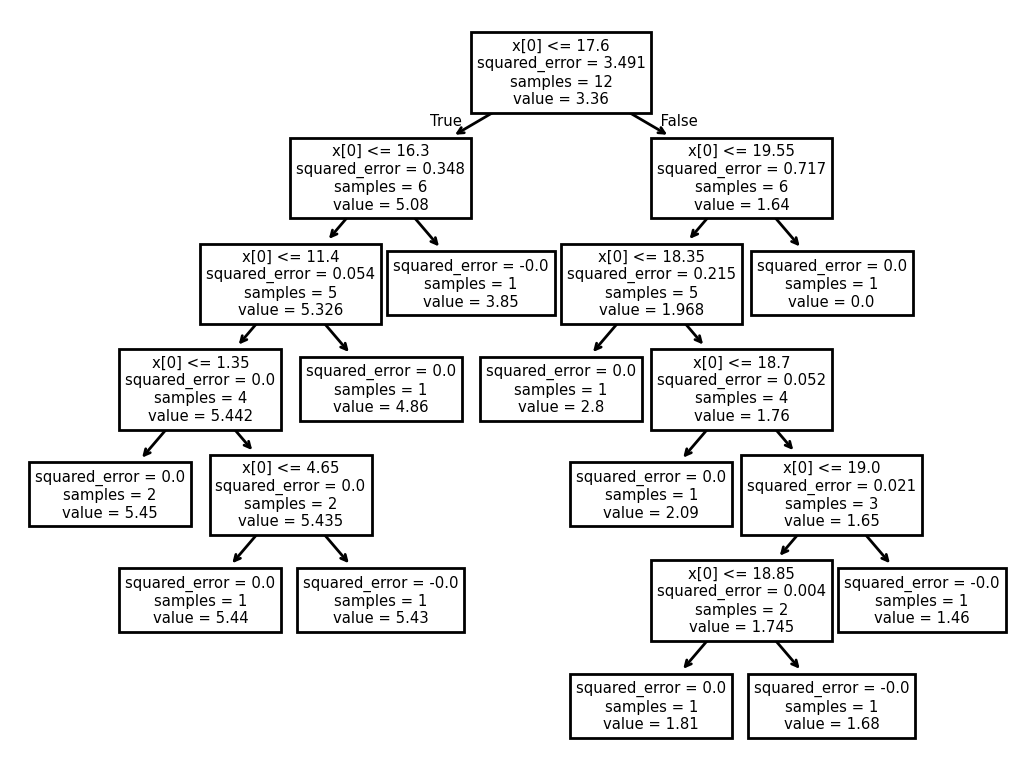

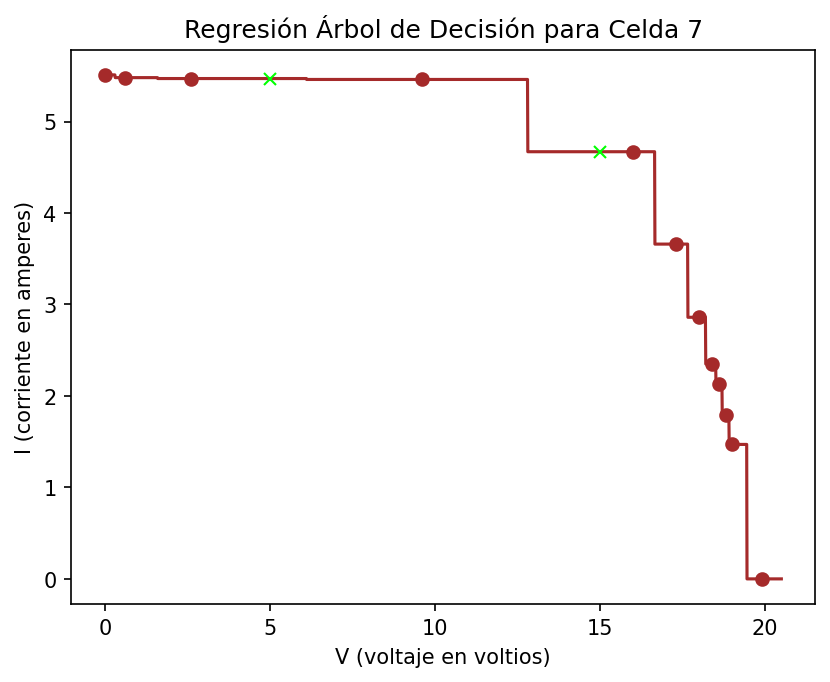







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








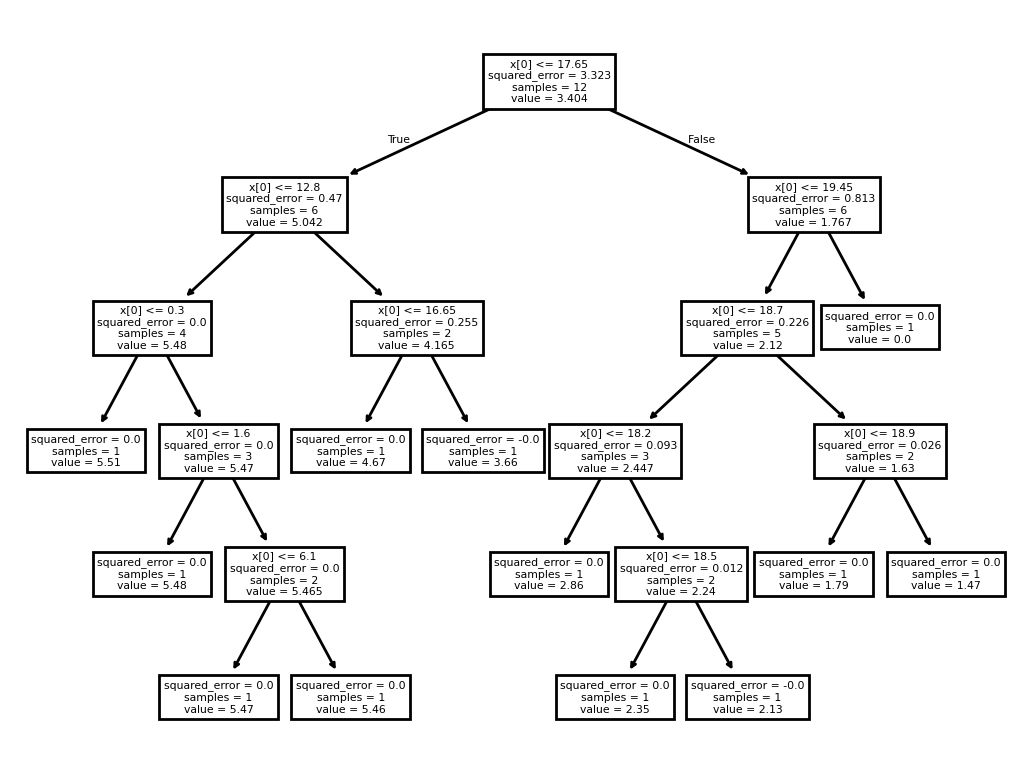

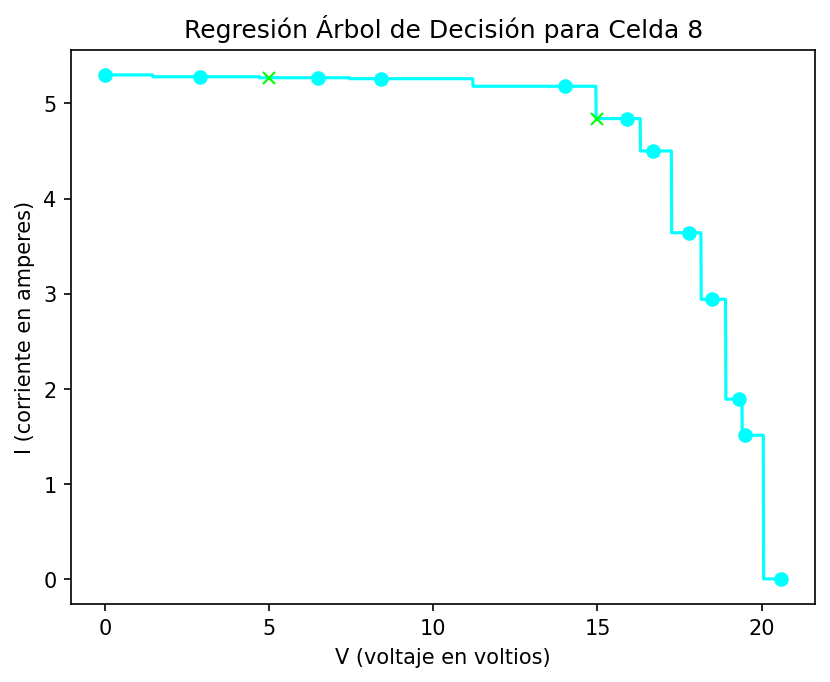







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








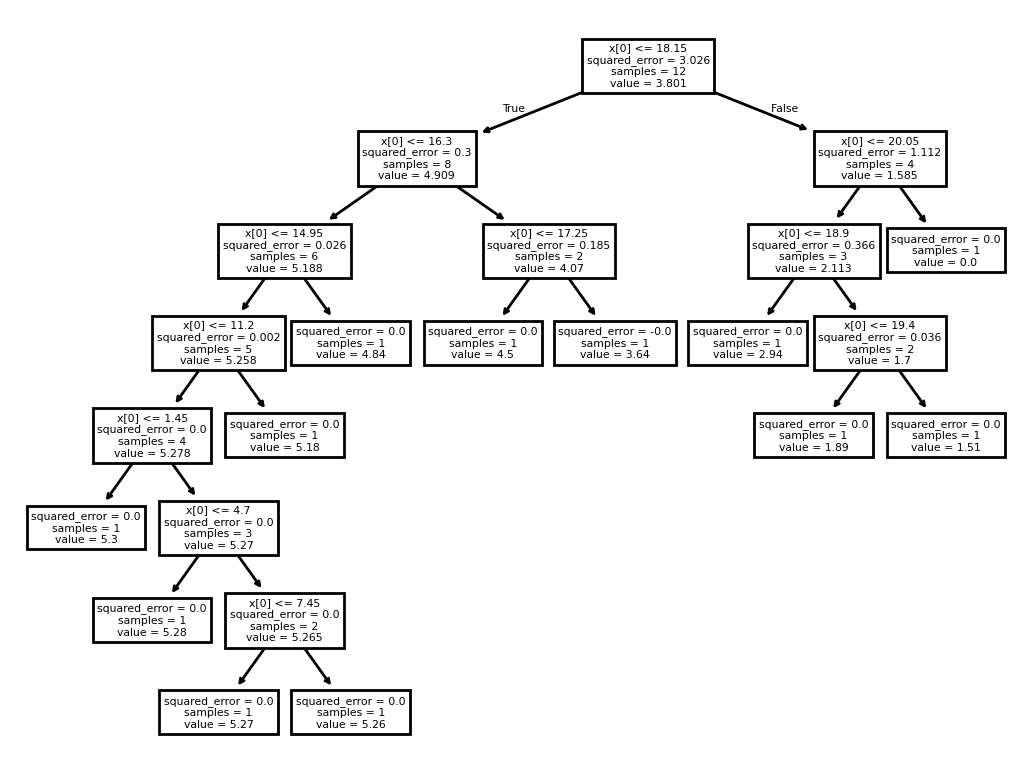

In [8]:
for i, color in enumerate(colores):
    regresion_arbol(data[f'Vcelda{i+1}'], data[f'Icelda{i+1}'], color, f'{i+1}')